In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data.csv', index_col = 0)
df1 = pd.DataFrame(df)
df1 = df1.loc[:, ~df.columns.str.contains('^Unnamed')]


In [3]:
df1=df1.rename(columns={'diagnosis':'label'})
print(df1.dtypes)

label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

<AxesSubplot:xlabel='label', ylabel='count'>

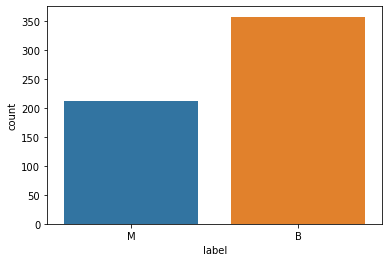

In [4]:
sns.countplot(x="label" ,data=df1)

In [5]:
print("distribution of data",df1['label'].value_counts())
y=df1["label"].values
print("Label are",np.unique(y))

distribution of data B    357
M    212
Name: label, dtype: int64
Label are ['B' 'M']


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
Y= encoder.fit_transform(y)
print("label are",np.unique(Y))

label are [0 1]


In [7]:
X = df1.drop(labels = ["label"], axis = 1)
print(X.describe().T)

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [11]:
model= Sequential()
model.add(Dense(16,input_dim=30,
activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history=model.fit(X_train,Y_train, verbose=1, epochs=100, batch_size=75,
                  validation_data=(X_test, Y_test))

Epoch 1/100
6/6 [==============================] - 1s 60ms/step - loss: 0.6833 - accuracy: 0.6315 - val_loss: 0.6751 - val_accuracy: 0.6573
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6742 - accuracy: 0.6291 - val_loss: 0.6625 - val_accuracy: 0.6713
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6570 - accuracy: 0.6714 - val_loss: 0.6514 - val_accuracy: 0.7133
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6568 - accuracy: 0.7042 - val_loss: 0.6411 - val_accuracy: 0.7413
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6455 - accuracy: 0.6972 - val_loss: 0.6311 - val_accuracy: 0.7762
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6382 - accuracy: 0.7066 - val_loss: 0.6213 - val_accuracy: 0.7902
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6255 - accuracy: 0.7277 - val_loss: 0.6113 - val_accuracy: 0.8042
Epoch 8/100
6/6 [=========

6/6 [==============================] - 0s 5ms/step - loss: 0.2801 - accuracy: 0.9061 - val_loss: 0.2284 - val_accuracy: 0.9510
Epoch 60/100
6/6 [==============================] - 0s 6ms/step - loss: 0.2826 - accuracy: 0.8991 - val_loss: 0.2245 - val_accuracy: 0.9510
Epoch 61/100
6/6 [==============================] - 0s 6ms/step - loss: 0.2731 - accuracy: 0.8967 - val_loss: 0.2207 - val_accuracy: 0.9580
Epoch 62/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2645 - accuracy: 0.9225 - val_loss: 0.2169 - val_accuracy: 0.9580
Epoch 63/100
6/6 [==============================] - 0s 7ms/step - loss: 0.2813 - accuracy: 0.9014 - val_loss: 0.2134 - val_accuracy: 0.9510
Epoch 64/100
6/6 [==============================] - 0s 8ms/step - loss: 0.2624 - accuracy: 0.9131 - val_loss: 0.2103 - val_accuracy: 0.9510
Epoch 65/100
6/6 [==============================] - 0s 6ms/step - loss: 0.2667 - accuracy: 0.9061 - val_loss: 0.2088 - val_accuracy: 0.9580
Epoch 66/100
6/6 [===============

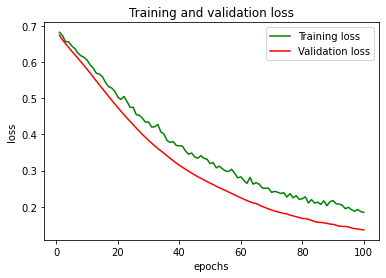

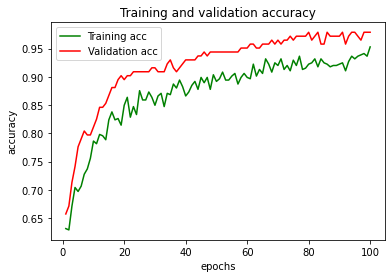

In [13]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs= range (1, len(loss) +1)
plt.plot(epochs,loss,'g',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

acc=history.history['accuracy']
val_acc= history.history['val_accuracy']
plt.plot(epochs,acc,'g',label='Training acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [14]:
Y_pred=model.predict(X_test)
Y_pred=(Y_pred > 0.5)

5/5 [==============================] - 0s 2ms/step


In [15]:
model.evaluate(X_test, Y_test)[1]

5/5 [==============================] - 0s 4ms/step - loss: 0.1357 - accuracy: 0.9790


0.9790209531784058

<AxesSubplot:>

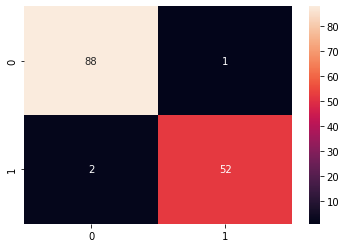

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm,annot=True)